In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

 94% 325M/346M [00:02<00:00, 167MB/s]
100% 346M/346M [00:02<00:00, 146MB/s]


In [ ]:
from zipfile import ZipFile 
file_name = "intel-image-classification.zip"

with ZipFile (file_name ,"r") as zip:
  zip.extractall()
  print ("Done")

Done


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pathlib
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
train_dir='/content/seg_train/seg_train/'
train_datagen = ImageDataGenerator( rescale = 1.0/255,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          vertical_flip=True,
                                          fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))
test_dir='/content/seg_test/seg_test/'
test_datagen=ImageDataGenerator(rescale=1/255,
                               width_shift_range=0.2,
                               height_shift_range=0.2,zoom_range=0.2,vertical_flip=True,
                               fill_mode='nearest')
test_generator=test_datagen.flow_from_directory(test_dir,batch_size=32,
                                               class_mode='categorical',
                                               target_size=(150,150))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
pre_trained_model=InceptionV3(include_top=False,input_shape=(150,150,3))
for layer in pre_trained_model.layers:
    layer.trainable = False

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
last_layer=pre_trained_model.get_layer('mixed9')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output  

last layer output shape:  (None, 3, 3, 2048)


In [ ]:
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau

In [ ]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(units = 1024, activation = tf.nn.relu)(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense  (6, activation = tf.nn.softmax)(x)

model = tf.keras.Model( pre_trained_model.input, x)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=1,
                                            verbose=1,
                                            factor=0.25,
                                            min_lr=0.000003)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
history = model.fit(
            train_generator,
            verbose=1,
            validation_data = test_generator,
            epochs = 10,
    callbacks=[learning_rate_reduction])

Epoch 1/10
439/439 [==============================] - 106s 220ms/step - loss: 0.5707 - accuracy: 0.7832 - val_loss: 0.3827 - val_accuracy: 0.8560
Epoch 2/10
439/439 [==============================] - 95s 217ms/step - loss: 0.3512 - accuracy: 0.8689 - val_loss: 0.3456 - val_accuracy: 0.8737
Epoch 3/10
439/439 [==============================] - 93s 212ms/step - loss: 0.3332 - accuracy: 0.8736 - val_loss: 0.3410 - val_accuracy: 0.8730
Epoch 4/10
439/439 [==============================] - 94s 215ms/step - loss: 0.3095 - accuracy: 0.8819 - val_loss: 0.3303 - val_accuracy: 0.8800
Epoch 5/10
439/439 [==============================] - 92s 211ms/step - loss: 0.2943 - accuracy: 0.8932 - val_loss: 0.3245 - val_accuracy: 0.8790
Epoch 6/10
439/439 [==============================] - 91s 207ms/step - loss: 0.2675 - accuracy: 0.8985 - val_loss: 0.3223 - val_accuracy: 0.8823
Epoch 7/10
439/439 [==============================] - 91s 207ms/step - loss: 0.2732 - accuracy: 0.8998 - val_loss: 0.3387 - val_a

In [ ]:
import matplotlib.pyplot as plt

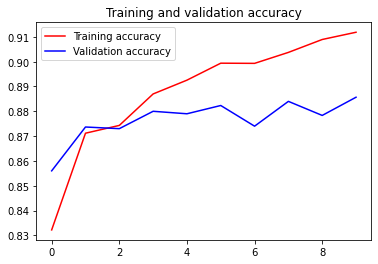

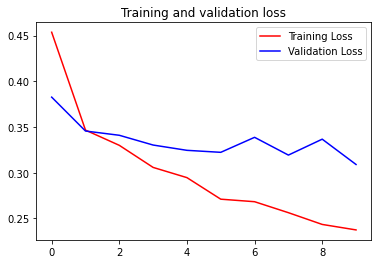

In [ ]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()